# Lab 6 - BCC406

## REDES NEURAIS E APRENDIZAGEM EM PROFUNDIDADE

## Detecção e Segmentação de objetos

### Prof. Eduardo e Prof. Pedro

Objetivos:
- Detecção de objetos

Data da entrega : 25/02

- Este notebook é baseado em tensorflow e Keras.
- Execute todo notebook e salve tudo em um PDF **nomeado** como "NomeSobrenome-LabX.pdf"
- Envie o PDF via google [FORM](https://forms.gle/pYuRamBz24uQF5j68)

# Detecção de Objetos (100pt)




Execute o tutorial do [link](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/hub/tutorials/tf2_object_detection.ipynb). Faça um teste com os seguintes modelos:

- EfficientDet D0 512x512
- SSD MobileNet V2 FPNLite 320x320
- SSD ResNet50 V1 FPN 640x640 (RetinaNet50)
- Faster R-CNN ResNet50 V1 640x640
- Mask R-CNN Inception ResNet V2 1024x1024

Teste com imagens de:

- Praia ([link](https://www.em.com.br/emfoco/wp-content/uploads/2024/11/Praia-Grande-SP-Wikimedia-Commons-1-750x375.jpg))
- Cachorros ([link](https://media.istockphoto.com/id/1482207337/pt/foto/group-of-dogs-of-different-sizes-and-breeds-looking-at-the-camera-some-cute-panting-or-happy.jpg?s=612x612&w=0&k=20&c=ffkWcqQtruL_SMWVhIBJv9QV5fkxFHzd9tidQw9omS8=))
- Pássartos ([link](https://static.vecteezy.com/ti/fotos-gratis/t2/49201489-colorida-passaros-empoleirado-em-uma-ramo-dentro-uma-exuberante-verde-floresta-durante-luz-do-dia-foto.jpeg))


Deixe disponível aqui somente as saídas dos modelos que você testou. Não é necessário copiar todo tutorial para cá.


In [ ]:
import matplotlib.pyplot as plt

def plot_images(model):
    targets = ["beach", "dog", "bird"]

    for target in targets:
        img_path = target + "_" + model + ".png"
        imagem = plt.imread(img_path)

        # Exibe a imagem
        plt.imshow(imagem)
        plt.axis('off')  # Remove os eixos (opcional)
        plt.show()


## Modelo EfficientDet D0 512x512 (10pt)

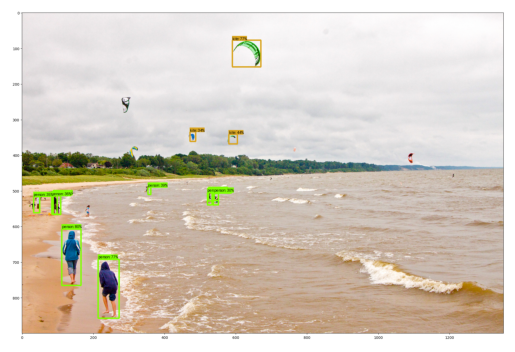

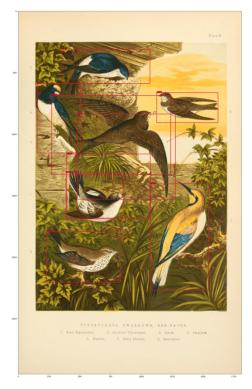

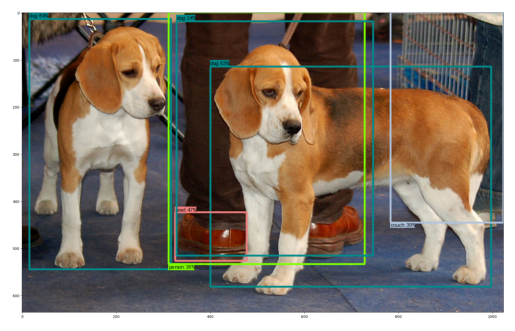

In [ ]:
plot_images("efficientDet")

## Modelo SSD MobileNet V2 FPNLite 320x320 (10pt)

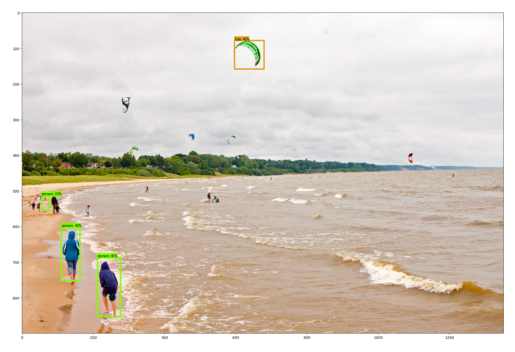

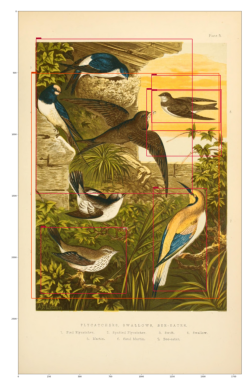

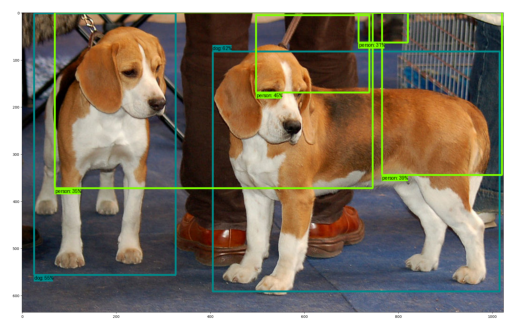

In [ ]:
plot_images("ssd_mobilenet")

## Modelo SSD ResNet50 V1 FPN 640x640 - RetinaNet50 (10pt)

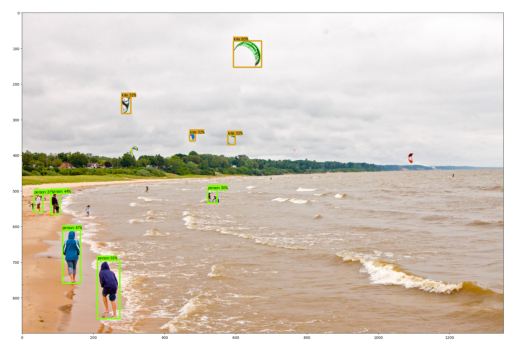

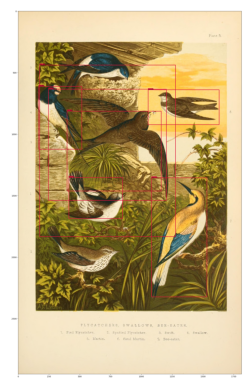

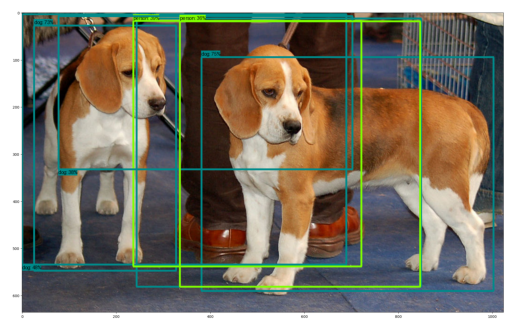

In [ ]:
plot_images("ssd_resnet")

## Modelo Faster R-CNN ResNet50 V1 640x640 (10pt)

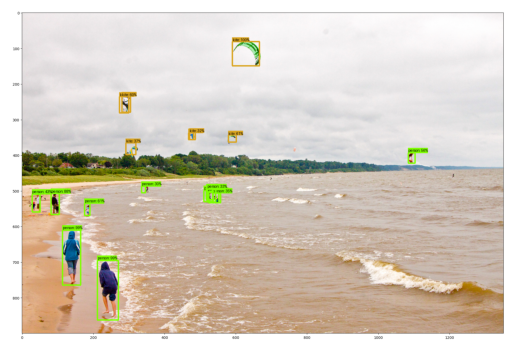

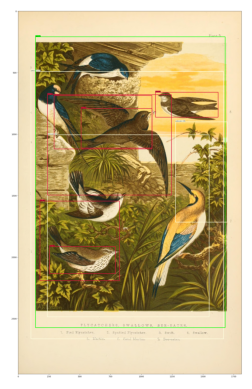

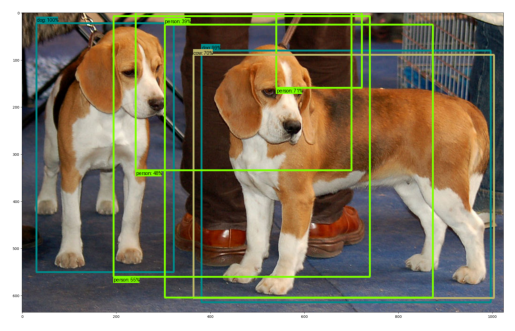

In [ ]:
plot_images("faster")

## Modelo Mask R-CNN Inception ResNet V2 1024x1024 (10pt)

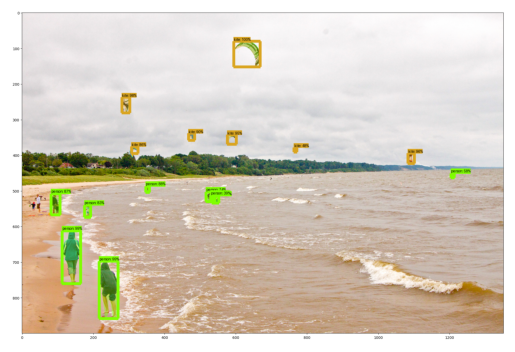

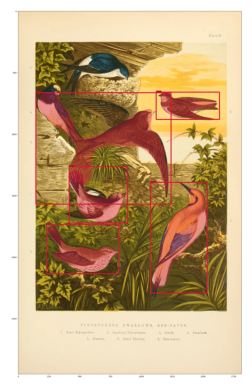

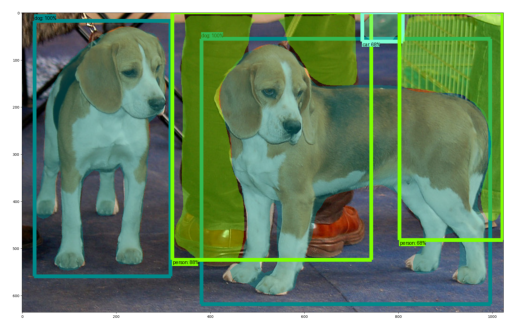

In [ ]:
plot_images("mask")

## Entendendo os resultados (20pt)

*ToDo:* O que você pode descrever sobre os resultados obtidos?

```
Todas as imagens possuem um tamanho muito maior do que a entrada de qualquer um dos modelos. Todavia, a da praia possui objetos pequenos para serem detectados, a dos cachorros possui objetos grandes e a dos passáros está em um meio termo

EfficientDet: A imagem dos passáros possui uma confiança baixa em algumas predições, enquanto alguns passáros são detectados duas vezes. O mesmo ocorre com os cachorros, mas ainda há uma predição de um sofá onde não existe. Já para a praia são feitas boas predições, mas faltou identificar uma pessoa e uma skite.

SSD Mobilenet: Apresentou péssimos resultados, fazendo poucas predições na praia, identificou várias pessoas nas imagens dos cachorros e não identificou um passáro enquanto outro foi identificado duas vezes.

SSD Resnet: Possui os mesmos problemas da versão com a Mobilenet

Faster R-CNN: Para a imagem da praia onde os objetos são pequenos, foi possível detectar muito bem os itens, superando todos os outros modelos. Todavia, nas imagens em que os alvos eram maiores ela falhou, identificando um cachorro tanto como cachorro como vaca e identificando que a imagem dos passáros era de uma cama.

Mask R-CNN: Apresentou os melhores resultados, porém não identificou um único passáro e duas pessoas na praia, ao passo que identificou um carro na imagem dos cachorros.

Pode-se levantar a hipótese de que, devido ao maior tamanho de entrada aceito pela Mask R-CNN, as imagens sofreram poucas modificações para passarem pela inferência, o que evitou perdas na qualidade das mesmas, permitindo predições melhores
```

## Custo computacional (30pt)

Compute o custo computacional (tempo de inferência) de cada modelo acima

Dica : Use o método "default_timer" da biblioteca "timeit"

In [ ]:
import timeit

def make_inferences():
    models = [
        'EfficientDet D0 512x512',
        'SSD MobileNet V2 FPNLite 320x320',
        'SSD ResNet50 V1 FPN 640x640 (RetinaNet50)',
        'Faster R-CNN ResNet50 V1 640x640',
        'Mask R-CNN Inception ResNet V2 1024x1024'
    ]

    for model in models:
        model_handle = ALL_MODELS[model]
        hub_model = hub.load(model_handle)

        image_path = IMAGES_FOR_TEST["Beach"]
        image_np = load_image_into_numpy_array(image_path)

        # Fazendo a inferência
        inicio = timeit.default_timer()

        hub_model(image_np)

        fim = timeit.default_timer()
        print (f'{model}: duracao: %f' % (fim - inicio))

make_inferences()

*   EfficientDet D0 512x512: duracao: 4.920923
*   SSD MobileNet V2 FPNLite 320x320: duracao: 3.633905
*   SSD ResNet50 V1 FPN 640x640 (RetinaNet50): duracao: 3.893012
*   Faster R-CNN ResNet50 V1 640x640: duracao: 6.880522
*   Mask R-CNN Inception ResNet V2 1024x1024: duracao: 6.499287


Os códigos foram executados no Notebook do tf2_object_detection

## Detectando objetos com dados próprios (Opcional / 20 Pontos Extra)


Caso você queira usar as técnicas de detecção de objetos em uma base de dados própria, siga o tutorial do [link](https://colab.research.google.com/github/luxonis/depthai-ml-training/blob/master/colab-notebooks/Easy_Object_Detection_With_Custom_Data_Demo_Training.ipynb). Você também pode se basear no no trabalho do [link](https://medium.com/swlh/tensorflow-2-object-detection-api-with-google-colab-b2af171e81cc).

Relate sua experiência e anexe aqui os resultados.